# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
#     city_url = url + "appid=" + weather_api_key + "&q=" + cities
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | as sars
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | bakanas
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | westport
Processing Record 9 of Set 1 | nova sintra
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | tobruk
Processing Record 16 of Set 1 | vikhorevka
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | oranjemund
Processing Record 21 of Set 1 | cuito
Processing Record 22 of Set 1 | chonchi
Processing Record

Processing Record 42 of Set 4 | meadow lakes
Processing Record 43 of Set 4 | vadso
Processing Record 44 of Set 4 | holualoa
Processing Record 45 of Set 4 | kaffrine
Processing Record 46 of Set 4 | qaqortoq
Processing Record 47 of Set 4 | bam
Processing Record 48 of Set 4 | afaahiti
Processing Record 49 of Set 4 | yilan
Processing Record 0 of Set 5 | champerico
Processing Record 1 of Set 5 | puerto baquerizo moreno
Processing Record 2 of Set 5 | cobija
Processing Record 3 of Set 5 | hamilton
Processing Record 4 of Set 5 | punta cana
Processing Record 5 of Set 5 | puerto ayora
Processing Record 6 of Set 5 | palapye
Processing Record 7 of Set 5 | sechura
Processing Record 8 of Set 5 | kralendijk
Processing Record 9 of Set 5 | atafu village
Processing Record 10 of Set 5 | rio grande
Processing Record 11 of Set 5 | errachidia
Processing Record 12 of Set 5 | wamba
Processing Record 13 of Set 5 | vila franca do campo
Processing Record 14 of Set 5 | hassi messaoud
Processing Record 15 of Set 5

Processing Record 30 of Set 8 | katsuren-haebaru
Processing Record 31 of Set 8 | burela de cabo
Processing Record 32 of Set 8 | port saint john's
Processing Record 33 of Set 8 | zhangye
Processing Record 34 of Set 8 | bhamo
Processing Record 35 of Set 8 | aripuana
Processing Record 36 of Set 8 | alice springs
Processing Record 37 of Set 8 | pontoon beach
Processing Record 38 of Set 8 | bodaybo
Processing Record 39 of Set 8 | musan-up
Processing Record 40 of Set 8 | conceicao da barra
Processing Record 41 of Set 8 | suva
Processing Record 42 of Set 8 | kailua-kona
Processing Record 43 of Set 8 | cockburn town
Processing Record 44 of Set 8 | port macquarie
Processing Record 45 of Set 8 | brookings
Processing Record 46 of Set 8 | bijar
Processing Record 47 of Set 8 | alofi
Processing Record 48 of Set 8 | nuuk
Processing Record 49 of Set 8 | lata
Processing Record 0 of Set 9 | wuxi
Processing Record 1 of Set 9 | oodweyne
Processing Record 2 of Set 9 | freetown
Processing Record 3 of Set 9 

Processing Record 18 of Set 12 | magadan
Processing Record 19 of Set 12 | polyarnyy
Processing Record 20 of Set 12 | baotou
Processing Record 21 of Set 12 | saladas
Processing Record 22 of Set 12 | bafoulabe
Processing Record 23 of Set 12 | xinyuan
Processing Record 24 of Set 12 | zepce
Processing Record 25 of Set 12 | pangoa
Processing Record 26 of Set 12 | praia da vitoria
Processing Record 27 of Set 12 | woodland hills
Processing Record 28 of Set 12 | kauhava
Processing Record 29 of Set 12 | hilo
Processing Record 30 of Set 12 | tecate
Processing Record 31 of Set 12 | ain leuh
Processing Record 32 of Set 12 | mokhsogollokh
Processing Record 33 of Set 12 | nadi
Processing Record 34 of Set 12 | mildura
Processing Record 35 of Set 12 | calderitas
Processing Record 36 of Set 12 | masterton
Processing Record 37 of Set 12 | barra de santo antonio
Processing Record 38 of Set 12 | santa terezinha
Processing Record 39 of Set 12 | sapele
Processing Record 40 of Set 12 | el granada
Processing 

In [4]:
city_url

'https://api.openweathermap.org/data/2.5/weather?appid=b4083dcb6ed27d25566e7206d73007f8&q=soio'

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,278.94,95,100,9.70,TF,1683655508
1,as sars,36.0764,9.0212,289.94,82,95,5.27,TN,1683655508
2,margaret river,-33.9500,115.0667,291.78,74,12,10.99,AU,1683655509
3,papatowai,-46.5619,169.4708,281.05,91,100,1.78,NZ,1683655509
4,anadyr,64.7500,177.4833,266.43,93,100,3.00,RU,1683655509


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,278.94,95,100,9.70,TF,1683655508
1,as sars,36.0764,9.0212,289.94,82,95,5.27,TN,1683655508
2,margaret river,-33.9500,115.0667,291.78,74,12,10.99,AU,1683655509
3,papatowai,-46.5619,169.4708,281.05,91,100,1.78,NZ,1683655509
4,anadyr,64.7500,177.4833,266.43,93,100,3.00,RU,1683655509


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

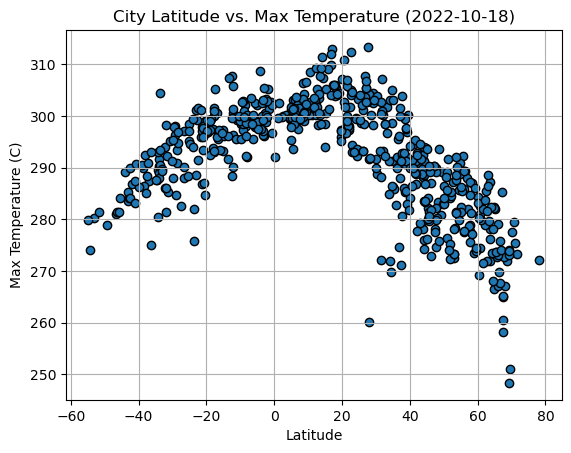

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df["Max Temp"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

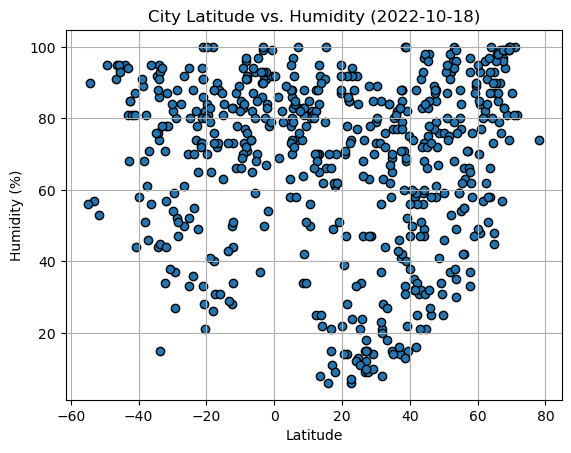

In [10]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

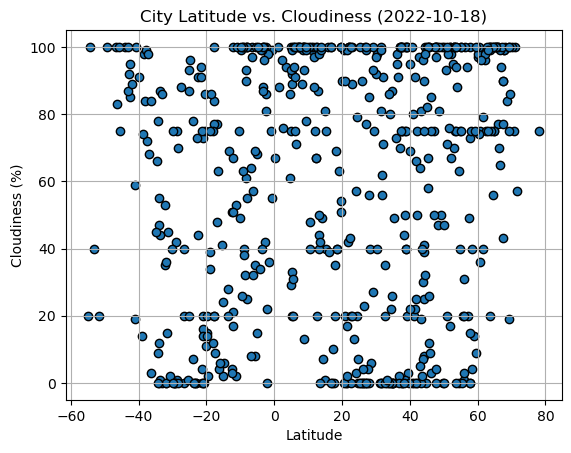

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

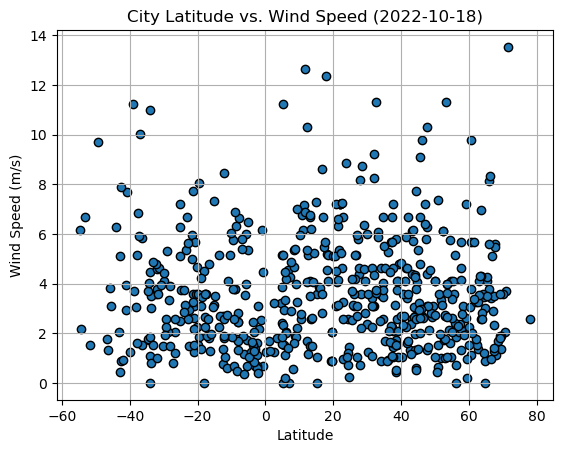

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept

    # Create scatter plot with regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")

    # Annotate the plot with the linear equation, r-value, and p-value
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.annotate(f"r-value = {round(rvalue, 2)}", (text_coordinates[0], text_coordinates[1]-20), fontsize=15, color="red")
    plt.annotate(f"p-value = {round(pvalue, 2)}", (text_coordinates[0], text_coordinates[1]-40), fontsize=15, color="red")

    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Show the plot
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,as sars,36.0764,9.0212,289.94,82,95,5.27,TN,1683655508
4,anadyr,64.7500,177.4833,266.43,93,100,3.00,RU,1683655509
5,bakanas,44.8081,76.2772,293.86,21,0,4.07,KZ,1683655510
7,westport,41.1415,-73.3579,295.12,35,0,4.12,US,1683655510
8,nova sintra,14.8667,-24.7167,294.06,79,1,7.27,CV,1683655511


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,278.94,95,100,9.70,TF,1683655508
2,margaret river,-33.9500,115.0667,291.78,74,12,10.99,AU,1683655509
3,papatowai,-46.5619,169.4708,281.05,91,100,1.78,NZ,1683655509
6,waitangi,-43.9535,-176.5597,289.16,95,100,6.26,NZ,1683655510
9,hermanus,-34.4187,19.2345,289.51,76,78,1.74,ZA,1683655511


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8047298381945942


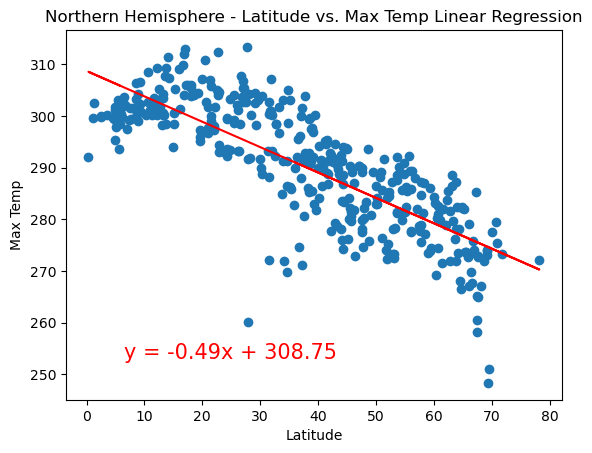

In [44]:
# Linear regression on Northern Hemisphere
# Define x and y values for linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression on Northern Hemisphere temperature vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Define equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,slope*x_values+intercept,"r-")

# Add line equation and other plot properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Latitude vs. Max Temp Linear Regression')

# Add slope formula to the plot
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", 
             (min(northern_hemi_df["Lat"])+5,max(northern_hemi_df["Max Temp"])-55),  
             xytext=(5,-20), textcoords='offset points', fontsize=15, color="red")

# Print r-value
print(f"The r-value is: {r_value}")

# Show plot
plt.show()

The r-value is: 0.7602517185549905


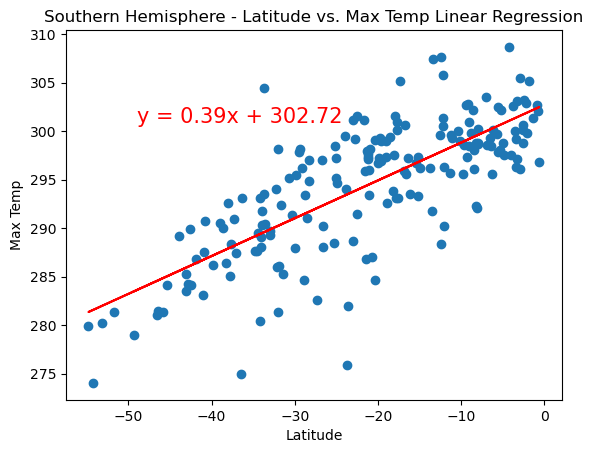

In [43]:
# Linear regression on Southern Hemisphere
# Define x and y values for linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression on Northern Hemisphere temperature vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Define equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,slope*x_values+intercept,"r-")

# Add line equation and other plot properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Latitude vs. Max Temp Linear Regression')

# Add slope formula to the plot
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", 
             (min(southern_hemi_df["Lat"])+5,max(southern_hemi_df["Max Temp"])-5),  
             xytext=(5,-20), textcoords='offset points', fontsize=15, color="red")

# Print r-value
print(f"The r-value is: {r_value}")

# Show plot
plt.show()

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15490664746255484


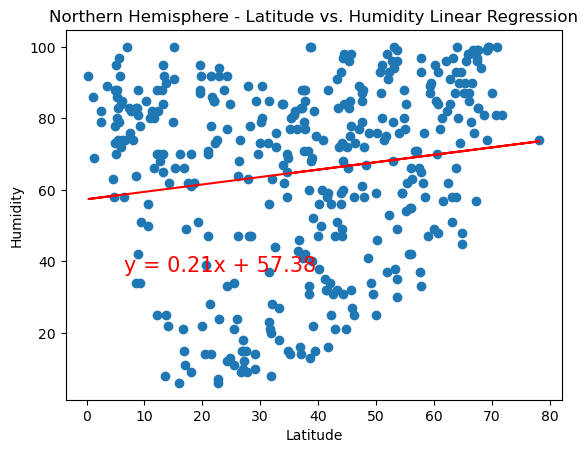

In [42]:
# Northern Hemisphere
# Define x and y values for linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression on Northern Hemisphere temperature vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Define equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,slope*x_values+intercept,"r-")

# Add line equation and other plot properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Latitude vs. Humidity Linear Regression')

# Add slope formula to the plot
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", 
             (min(northern_hemi_df["Lat"])+5,max(northern_hemi_df["Humidity"])-55),  
             xytext=(5,-20), textcoords='offset points', fontsize=15, color="red")

# Print r-value
print(f"The r-value is: {r_value}")

# Show plot
plt.show()

The r-value is: 0.09448477075692724


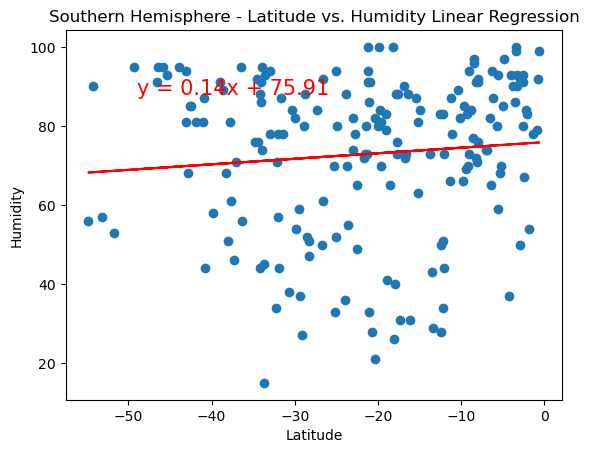

In [41]:
# Southern Hemisphere
# Define x and y values for linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression on Northern Hemisphere temperature vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Define equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,slope*x_values+intercept,"r-")

# Add line equation and other plot properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Latitude vs. Humidity Linear Regression')

# Add slope formula to the plot
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", 
             (min(southern_hemi_df["Lat"])+5,max(southern_hemi_df["Humidity"])-5),  
             xytext=(5,-20), textcoords='offset points', fontsize=15, color="red")

# Print r-value
print(f"The r-value is: {r_value}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a weak positive linear relationship between Latitude and Humidity in the Northern Hemisphere. As Latitude increases, Humidity tends to slightly increase as well. The linear regression line does not fit the data well, indicating a weak linear relationship between the two variables. The r-value of 0.15 indicates a weak positive correlation between the two variables. There is a weak positive linear relationship between Latitude and Humidity in the Southern Hemisphere as well. As Latitude increases, Humidity tends to slightly increase. The linear regression line does not fit the data well, indicating a weak linear relationship between the two variables. The r-value of 0.09 indicates a weak positive correlation between the two variables.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06472909325831278


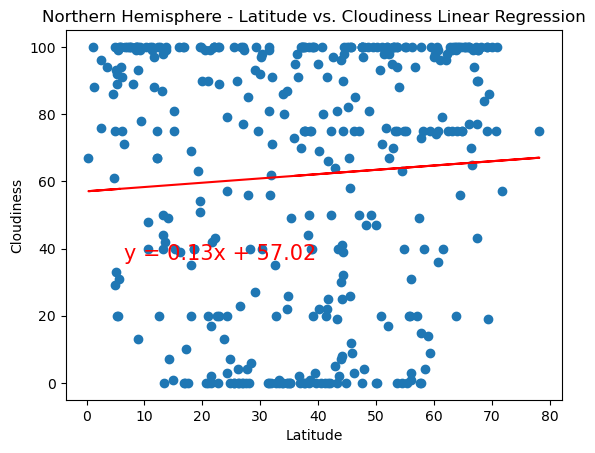

In [40]:
# Northern Hemisphere
# Define x and y values for linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression on Northern Hemisphere temperature vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Define equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,slope*x_values+intercept,"r-")

# Add line equation and other plot properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Latitude vs. Cloudiness Linear Regression')

# Add slope formula to the plot
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", 
             (min(northern_hemi_df["Lat"])+5,max(northern_hemi_df["Cloudiness"])-55),  
             xytext=(5,-20), textcoords='offset points', fontsize=15, color="red")

# Print r-value
print(f"The r-value is: {r_value}")

# Show plot
plt.show()

The r-value is: 0.04756135164024331


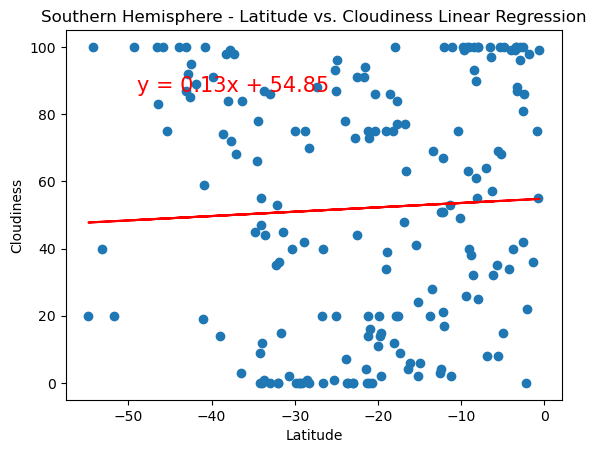

In [39]:
# Southern Hemisphere
# Define x and y values for linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression on Northern Hemisphere temperature vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Define equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,slope*x_values+intercept,"r-")

# Add line equation and other plot properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Latitude vs. Cloudiness Linear Regression')

# Add slope formula to the plot
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", 
             (min(southern_hemi_df["Lat"])+5,max(southern_hemi_df["Cloudiness"])-5),  
             xytext=(5,-20), textcoords='offset points', fontsize=15, color="red")

# Print r-value
print(f"The r-value is: {r_value}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a weak positive linear relationship between Latitude and Cloudiness in the Northern Hemisphere. As Latitude increases, Cloudiness tends to slightly increase as well. The linear regression line does not fit the data well, indicating a weak linear relationship between the two variables. The r-value of 0.06 indicates a weak positive correlation between the two variables. There is a weak positive linear relationship between Latitude and Cloudiness in the Southern Hemisphere as well. As Latitude increases, Cloudiness tends to slightly increase as well. The linear regression line does not fit the data well, indicating a weak linear relationship between the two variables. The r-value of 0.05 indicates a weak positive correlation between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.08515058967986178


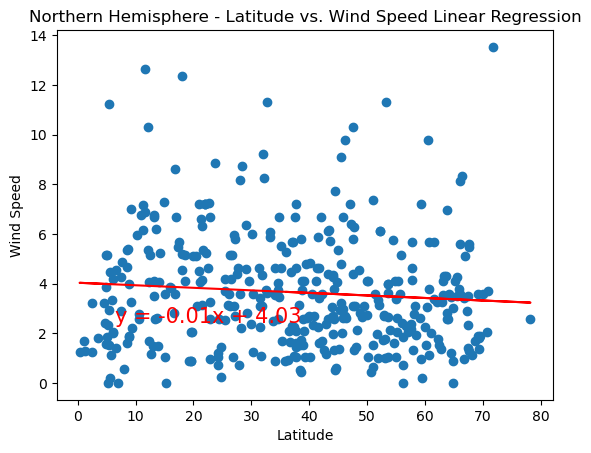

In [38]:
# Northern Hemisphere
# Define x and y values for linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression on Northern Hemisphere temperature vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Define equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,slope*x_values+intercept,"r-")

# Add line equation and other plot properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Latitude vs. Wind Speed Linear Regression')

# Add slope formula to the plot
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", 
             (min(northern_hemi_df["Lat"])+5,max(northern_hemi_df["Wind Speed"])-10),  
             xytext=(5,-20), textcoords='offset points', fontsize=15, color="red")

# Print r-value
print(f"The r-value is: {r_value}")

# Show plot
plt.show()

The r-value is: -0.22539052652694339


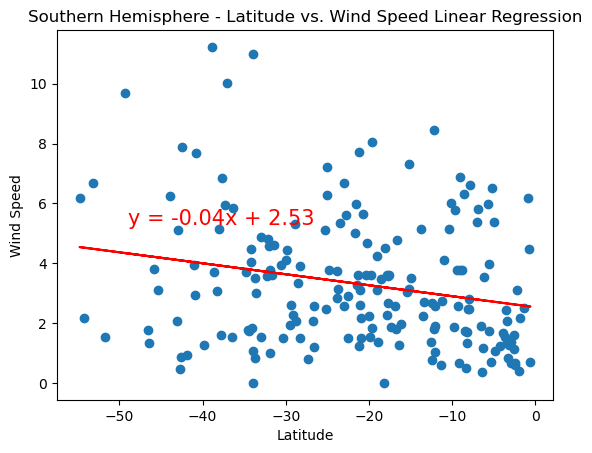

In [36]:
# Southern Hemisphere
# Define x and y values for linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression on Northern Hemisphere temperature vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Define equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,slope*x_values+intercept,"r-")

# Add line equation and other plot properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Latitude vs. Wind Speed Linear Regression')

# Add slope formula to the plot
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", 
             (min(southern_hemi_df["Lat"])+5,max(southern_hemi_df["Wind Speed"])-5),  
             xytext=(5,-20), textcoords='offset points', fontsize=15, color="red")

# Print r-value
print(f"The r-value is: {r_value}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a weak negative linear relationship between Latitude and Wind Speed in the Northern Hemisphere. As Latitude increases, Wind Speed tends to slightly decrease. The linear regression line does not fit the data well, indicating a weak linear relationship between the two variables. The r-value of -0.09 indicates a weak negative correlation between the two variables. There is a weak negative linear relationship between Latitude and Wind Speed in the Southern Hemisphere. As Latitude increases, Wind Speed tends to decrease slightly. The linear regression line does not fit the data well, indicating a weak linear relationship between the two variables. The r-value of -0.23 indicates a weak negative correlation between the two variables.